# ライブラリ

In [38]:
#importing basic libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import missingno as mn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly
import plotly.express as px
import plotly.figure_factory as ffb
import plotly.offline as offline
pyo.init_notebook_mode()

# データのインプット

In [40]:
# display 300 column and rows
pd.set_option('display.max_rows', 300)
test=pd.read_csv('./test.csv')
train=pd.read_csv('./train.csv')

# データこねくり回し

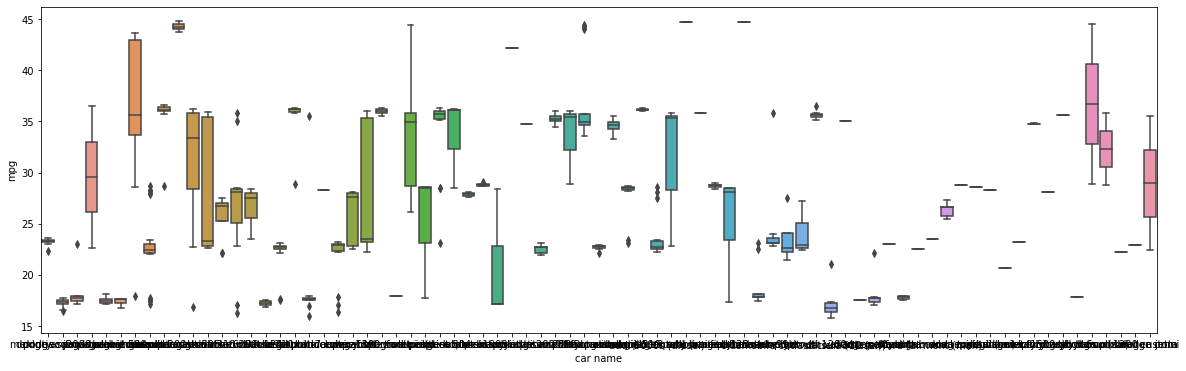

In [36]:
# px.box(train,y='mpg',x='car name')
temp = train[['car name','mpg']].reset_index()
# train = seaborn.load_dataset( 'train' )
fig = plt.figure(figsize=(20.0, 6.0))
sns.boxplot( x=train['car name'], y=train['mpg'] )
plt.show()

# temp['car name'].unique()
# key  = 'car name'
# temp = temp.groupby(key)
# temp_mpg = temp.mean()
# # temp_mpg = temp_mpg['mpg'].sort_values(by='mpg',ascending=False)
# # temp_mpg = temp_mpg['mpg'].sort_index(axis=3, ascending=False)
# temp_mpg

In [60]:
efficiency = train[train['mpg'] < 20]
efficiency_car = efficiency['car name'].unique()
unefficiency = train[train['mpg'] > 35]
unefficiency_car = unefficiency['car name'].unique()
# unefficiency_car
# popular_menu['car name'].value_counts()
# popular_menu

array(['amc gremlin', 'datsun 200sx', 'renault lecar deluxe',
       'datsun 210', 'datsun 200-sx', 'fiat 124 sport coupe',
       'buick regal sport coupe (turbo)', 'ford pinto', 'peugeot 504',
       'mercury capri 2000', 'datsun 810 maxima', 'chevrolet nova',
       'pontiac astro', 'chevrolet impala', 'buick century limited',
       'volkswagen rabbit custom diesel', 'buick lesabre custom',
       'amc pacer d/l', 'amc ambassador dpl', 'datsun 210 mpg',
       'triumph tr7 coupe', 'pontiac lemans v6', 'plymouth valiant',
       'datsun 510 (sw)', 'ford mustang ii 2+2',
       'pontiac j2000 se hatchback', 'plymouth champ', 'saab 99le',
       'toyota corolla', 'datsun 1200', 'dodge omni'], dtype=object)

# データの下処理

In [5]:
# temp=train['horsepower'].astype(np.float64)
# temp=train['horsepower'].str.replace('?',train['horsepower'].mode())
# temp['horsepower']=temp['horsepower'].replace('?',np.nan).reset_index()
train['horsepower']=train['horsepower'].replace('?',np.nan)
train["horsepower"] = pd.to_numeric(train["horsepower"], errors="coerce")
train["horsepower"] = train["horsepower"].fillna(train["horsepower"].mean())
# train['mpg_hie'] = pd.cut(train['mpg'], bins=np.arange(0, 100, 10), right=False)
test['horsepower']=test['horsepower'].replace('?',np.nan)
test["horsepower"] = pd.to_numeric(test["horsepower"], errors="coerce")
test["horsepower"] = test["horsepower"].fillna(test["horsepower"].mean())
# test['mpg_hie'] = pd.cut(train['mpg'], bins=np.arange(0, 100, 10), right=False)         
# temp.astype(np.float64).reset_index()
# temp
# temp.unique()
# train['horsepower'].mode()

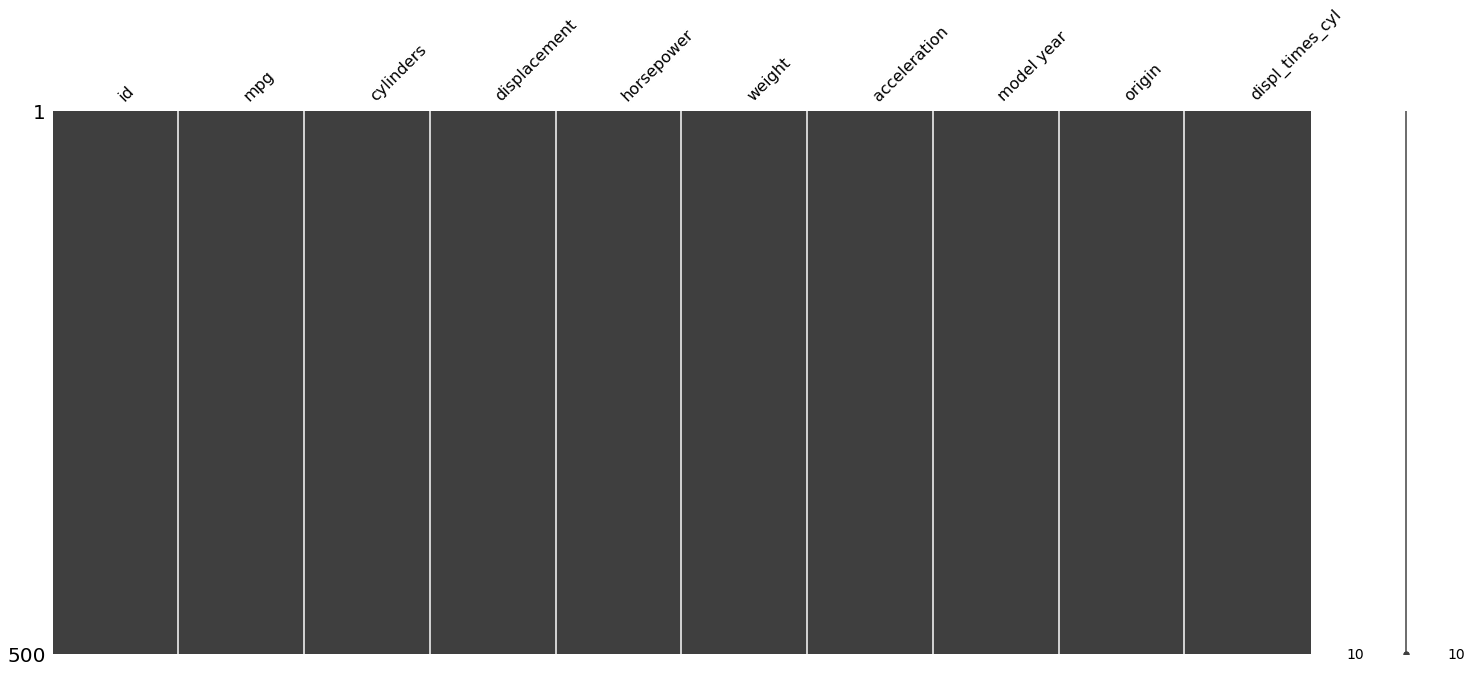

In [129]:
mn.matrix(train)

# データの可視化

In [54]:
profile=pp.ProfileReport(train)
profile.to_file(output_file="train.html")

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
id                 500 non-null int64
mpg                500 non-null float64
cylinders          500 non-null int64
displacement       500 non-null int64
horsepower         500 non-null float64
weight             500 non-null int64
acceleration       500 non-null float64
model year         500 non-null int64
origin             500 non-null int64
displ_times_cyl    500 non-null int64
dtypes: float64(3), int64(7)
memory usage: 39.2 KB


In [1]:
train.describe(include='all')

NameError: name 'train' is not defined

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



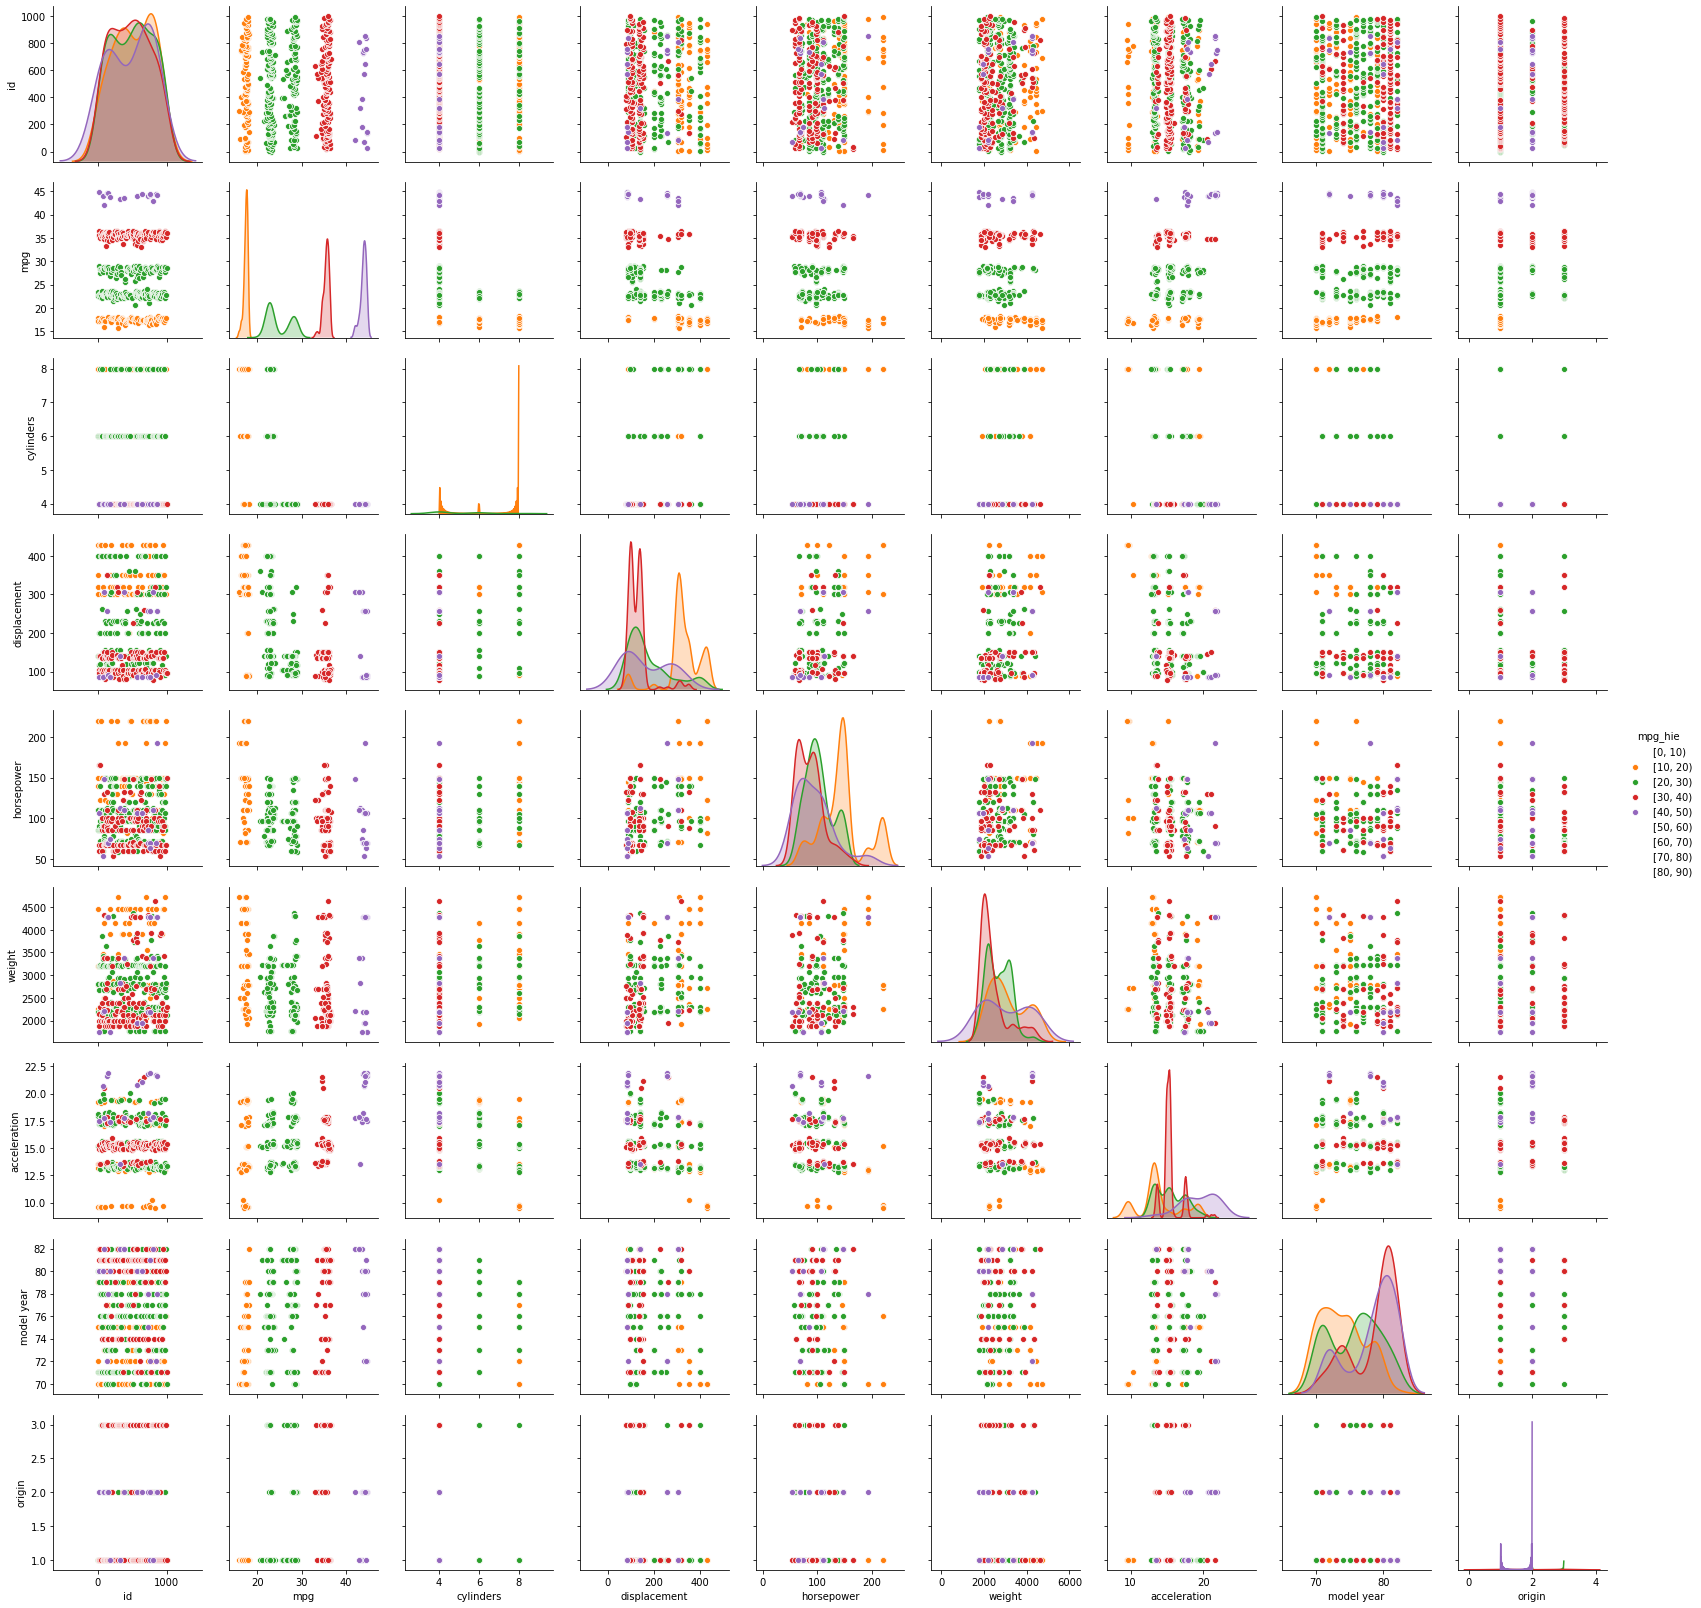

In [61]:
sns.pairplot(train,hue='mpg_hie').savefig('./seaborn_pairplot_hue.png')

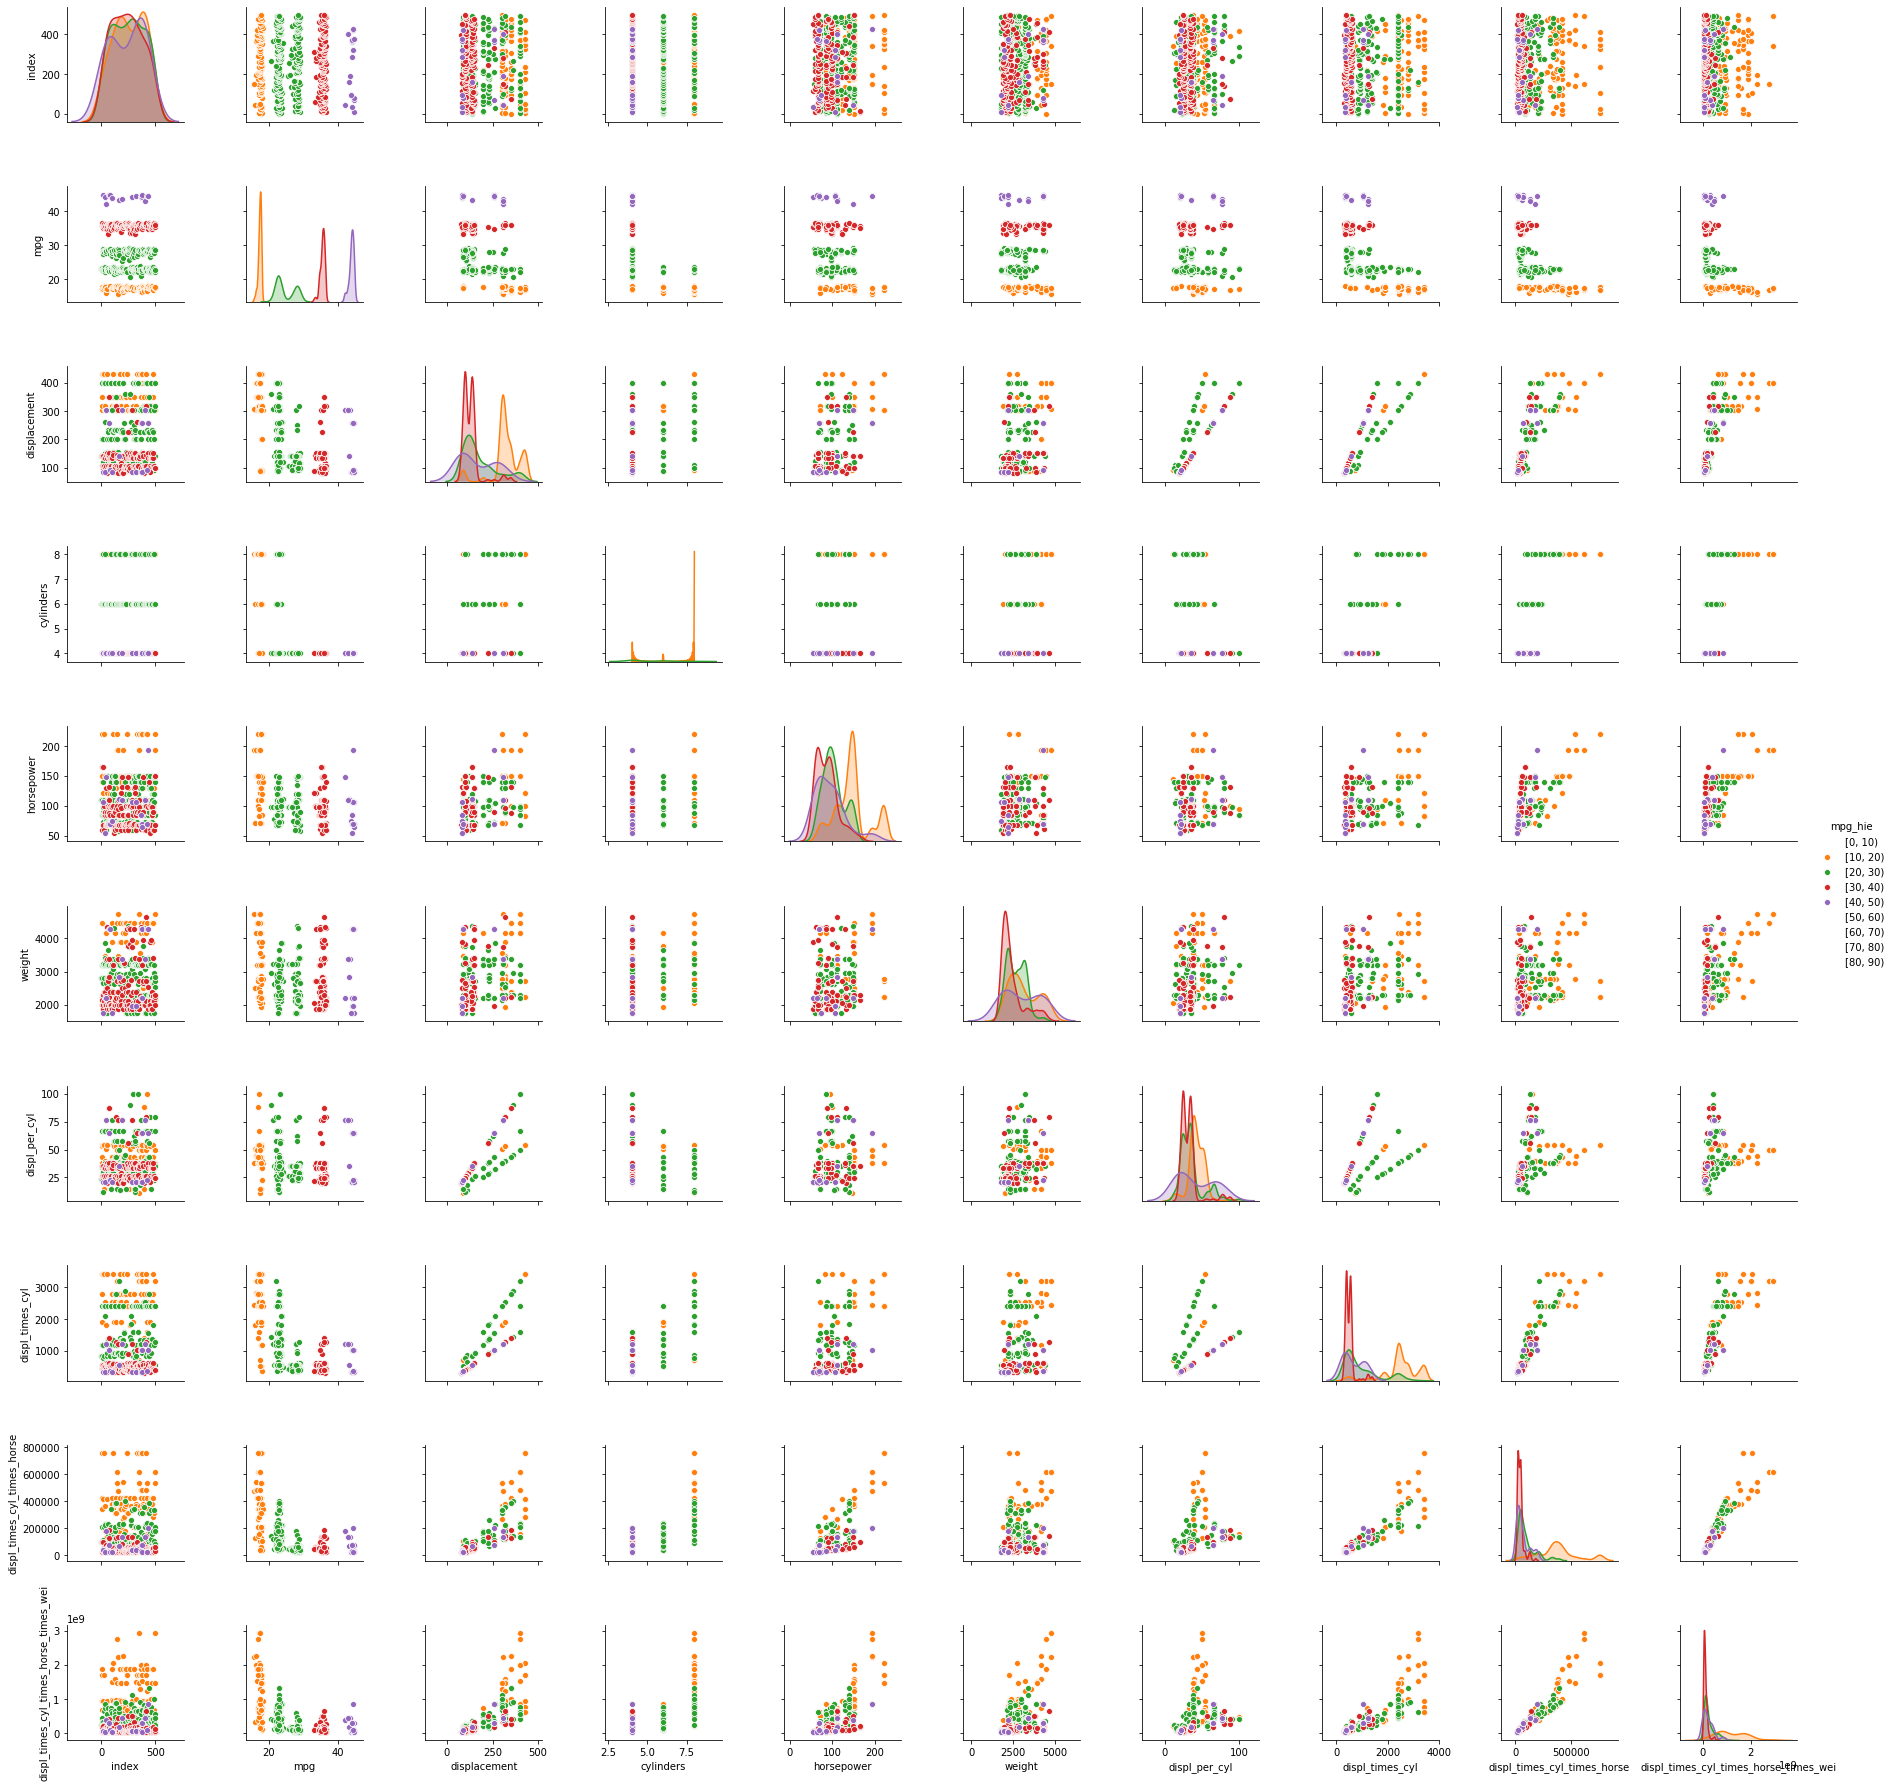

In [62]:
temp=train[['mpg','displacement','cylinders','horsepower','weight','mpg_hie']].reset_index()
temp['displ_per_cyl']=temp['displacement']/temp['cylinders']
temp['displ_times_cyl']=temp['displacement']*temp['cylinders']
temp['displ_times_cyl_times_horse']=temp['displacement']*temp['cylinders']*temp['horsepower']
temp['displ_times_cyl_times_horse_times_wei']=temp['displacement']*temp['cylinders']*temp['horsepower']*temp['weight']
sns.pairplot(temp,hue='mpg_hie')

# 特徴量の作成

In [119]:
train['displ_times_cyl']=train['displacement']*train['cylinders']
test['displ_times_cyl']=test['displacement']*test['cylinders']

# 機械学習前処理

In [120]:
delete_columns = ['car name']
train.drop(delete_columns, axis=1, inplace=True)
test.drop(delete_columns, axis=1, inplace=True)

In [121]:
X_train=train.drop('mpg',axis=1)
y_train=train['mpg']
X_test=test

# RandomForest

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


# clf = LogisticRegression(penalty='12',solver='sag',random_state=0)
# clf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
clf = RandomForestRegressor(n_estimators=100,max_depth=2,random_state=0)

In [132]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [133]:
y_pred = clf.predict(X_test)

 # LightGBM

In [125]:
from sklearn.model_selection import train_test_split


# X_train, X_valid, y_train, y_valid = \
#     train_test_split(X_train, y_train, test_size=0.3,
#                                  random_state=0, stratify=y_train)
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.3,
                                 random_state=0, stratify=y_train)

In [126]:
categorical_features = ['displ_times_cyl','horsepower','acceleration']

In [138]:
pip install optuna

     |████████████████████████████████| 246 kB 3.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 76 kB 3.8 MB/s eta 0:00:011
     |████████████████████████████████| 159 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 133 kB 5.1 MB/s eta 0:00:01     |██████████████████████▏         | 92 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 19.1 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 6.1 MB/s  eta 0:00:01
  Created wheel for optuna: filename=optuna-2.2.0-py3-none-any.whl size=340928 sha256=c0c0eda10908c82ba7343f0069f36b4d6cc2022da6ec3f99474c80522e329a5a
  Stored in directory: /root/.cache/pip/wheels/4b/38/71/f7458912ed20853ffe38cdd166ae4efb2c796257faf01ea205
  Created wheel for PrettyTable: filename=prettytable-0.7.2-py3-none-any.

In [139]:
import optuna
from sklearn.metrics import log_loss


def objective(trial):
    params = {
        'objective': 'binary',
        'max_bin': trial.suggest_int('max_bin', 255, 500),
        'learning_rate': 0.05,
        'num_leaves': trial.suggest_int('num_leaves', 32, 128),
    }

    lgb_train = lgb.Dataset(X_train, y_train,
                                             categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train,
                                            categorical_feature=categorical_features)

    model = lgb.train(params, lgb_train,
                                   valid_sets=[lgb_train, lgb_eval],
                                   verbose_eval=10,
                                   num_boost_round=1000,
                                   early_stopping_rounds=10)

    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    score = log_loss(y_valid, y_pred_valid)
    return score

In [141]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=40)

[I 2020-11-02 12:57:21,973] A new study created in memory with name: no-name-aacfcb89-3956-42e1-9eff-e62f1bba1b50
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning:

Using categorical_feature in Dataset.

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning:

Overriding the parameters from Reference Dataset.

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning:

categorical_column in param dict is overridden.

[W 2020-11-02 12:57:22,091] Trial 0 failed because of the following error: ValueError('Unknown label type: (217    22.426592\n426    22.282432\n288    27.007150\n150    18.099330\n459    17.535040\n111    23.142861\n69     35.556749\n236    17.207219\n45     15.991339\n376    17.977211\n486    36.403494\n77     27.499957\n16     28.361424\n130    35.873295\n54     35.689554\n0      23.059782\n439    17.360990\n156    35.023099\n256    29.053245\n25     28.102213\n325    34.660724\n199    22.782539\n

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 350, number of negative: 0
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 9
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Info] Start training from score 34.539576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 10 rounds

ValueError: Unknown label type: (217    22.426592
426    22.282432
288    27.007150
150    18.099330
459    17.535040
111    23.142861
69     35.556749
236    17.207219
45     15.991339
376    17.977211
486    36.403494
77     27.499957
16     28.361424
130    35.873295
54     35.689554
0      23.059782
439    17.360990
156    35.023099
256    29.053245
25     28.102213
325    34.660724
199    22.782539
369    16.275135
388    35.282330
306    22.811250
262    23.110340
222    22.990311
480    35.984434
311    23.077768
294    23.490845
226    28.457768
152    15.787613
89     22.864477
475    22.423486
276    17.718852
298    26.461405
55     23.219838
421    44.459649
118    28.495040
493    17.344275
443    28.080707
7      35.469676
46     17.201536
484    28.226779
187    35.350696
1      17.674521
153    35.944872
392    16.820890
430    44.301870
225    17.573846
56     22.685772
218    17.433179
471    17.896912
179    22.617729
477    16.931789
359    28.198404
90     22.813692
197    16.303879
384    28.867810
145    22.772618
336    28.676262
348    35.426057
442    17.854870
283    33.528057
468    35.893920
215    36.426457
478    28.643224
324    23.236068
301    23.005683
63     22.827026
407    28.048825
374    44.152813
253    28.555881
415    28.079580
365    36.301351
168    34.900281
220    17.613314
171    22.810436
481    28.874913
60     28.550953
160    43.290837
193    25.473700
460    22.793218
43     42.133089
340    36.570314
23     17.520138
146    35.463150
176    17.900621
216    35.781276
300    35.828510
211    22.481261
464    34.571433
79     44.718427
254    17.685511
72     34.653274
349    17.409522
316    22.864403
131    17.516873
4      17.872018
96     17.529862
391    36.217502
75     28.790093
124    35.788236
290    16.792143
212    28.744229
433    22.939389
78     18.107536
49     34.814283
206    17.450079
64     28.693474
48     23.008702
127    36.507002
143    22.296107
396    22.857539
114    35.496014
452    35.260981
285    17.802796
435    18.169419
92     23.144460
249    27.981284
287    23.060476
2      17.136353
67     22.311149
282    28.497374
366    43.974888
181    22.715096
200    35.565411
24     22.503044
268    28.905024
273    35.632395
280    35.789791
138    28.466359
113    35.893536
440    22.864294
99     27.805661
172    35.492973
163    22.886470
454    22.785648
437    28.740109
309    22.553199
315    36.073342
413    23.180747
386    17.608829
310    28.599065
345    35.586092
165    27.682178
323    36.142173
488    28.439202
408    17.462051
133    26.338554
Name: mpg, dtype: float64,)

In [127]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train, y_train,
                                         categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train,
                                         categorical_feature=categorical_features)

params = {
    'objective': 'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

model = lgb.train(params, lgb_train,
                               valid_sets=[lgb_train, lgb_eval],
                               verbose_eval=10,
                               num_boost_round=1000,
                               early_stopping_rounds=10)


y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 350, number of negative: 0
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 9
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Info] Start training from score 34.539576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 10 rounds

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning:

Using categorical_feature in Dataset.

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning:

Overriding the parameters from Reference Dataset.

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning:

categorical_column in param dict is overridden.



# Submit

In [135]:
submit = pd.read_csv('./sample_submit.csv', header=None, names=['id', 'mpg'])

In [136]:
# submit['loan_status']=y_pred.astype('int64')
submit['mpg']=y_pred
# submit.columns = [''] * len(submit.columns
# submit
submit.to_csv('file.csv', header=False, index=False)